<a href="https://colab.research.google.com/github/nahyunryou/Machine_Learning/blob/main/5_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solutions

## About the Data
In this notebook, we will be working with 3 datasets:
- Facebook's stock price throughout 2018 (obtained using the [`stock_analysis` package](https://github.com/stefmolin/stock-analysis))
- Earthquake data from September 18, 2018 - October 13, 2018 (obtained from the US Geological Survey (USGS) using the [USGS API](https://earthquake.usgs.gov/fdsnws/event/1/))
- European Centre for Disease Prevention and Control's (ECDC) [daily number of new reported cases of COVID-19 by country worldwide dataset](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide) collected on September 19, 2020 via [this link](https://opendata.ecdc.europa.eu/covid19/casedistribution/csv)

## Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/ML/ch_05/

/content/drive/MyDrive/ML/ch_05


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv('data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
quakes = pd.read_csv('data/earthquakes.csv')
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

## Exercise 1
Plot the rolling 20-day minimum of the Facebook closing price with the `pandas` method.

In [5]:
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


<AxesSubplot:title={'center':'Rolling 20D Minimum Closing Price of Facebook Stock'}, xlabel='date'>

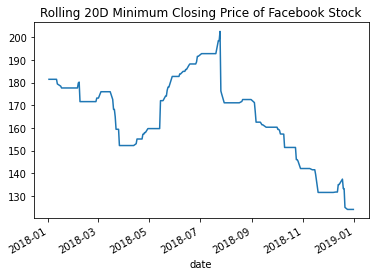

In [ ]:
fb.close.rolling('20D').min().plot(
    title='Rolling 20D Minimum Closing Price of Facebook Stock'
)

## Exercise 2
Create a histogram and KDE of the change from open to close in the price of Facebook stock.

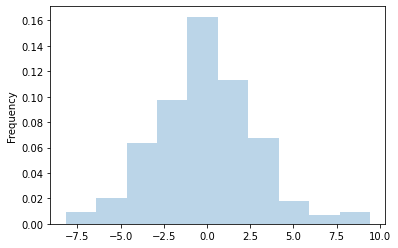

In [8]:
differential = fb.open - fb.close
ax = differential.plot(kind='hist', density=True, alpha=0.3)

<AxesSubplot:title={'center':"Facebook Stock Price's Daily Change from Open to Close"}, ylabel='Density'>

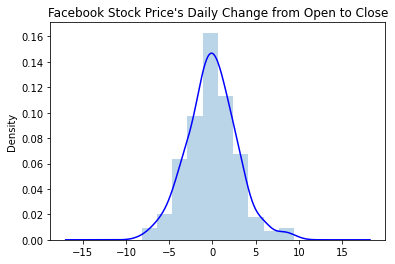

In [ ]:
differential = fb.open - fb.close
ax = differential.plot(kind='hist', density=True, alpha=0.3)
differential.plot(
    kind='kde', color='blue', ax=ax, 
    title='Facebook Stock Price\'s Daily Change from Open to Close'
)

## Exercise 3
Using the earthquake data, create box plots for the magnitudes of each `magType` used in Indonesia.

In [9]:
quakes.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


In [19]:
quakes.query('parsed_place == "Indonesia"')[['mag', 'magType']].head()

,mag,magType
9,4.7,mb
13,4.5,mb
180,5.2,mww
421,4.7,mb
660,4.4,mb


mb            AxesSubplot(0.1,0.15;0.173913x0.75)
ms_20    AxesSubplot(0.308696,0.15;0.173913x0.75)
mwr      AxesSubplot(0.517391,0.15;0.173913x0.75)
mww      AxesSubplot(0.726087,0.15;0.173913x0.75)
dtype: object

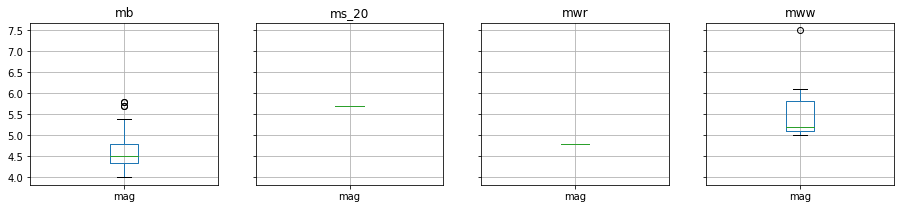

In [ ]:
quakes.query('parsed_place == "Indonesia"')[['mag', 'magType']]\
    .groupby('magType').boxplot(layout=(1, 4), figsize=(15, 3))

## Exercise 4
Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook.

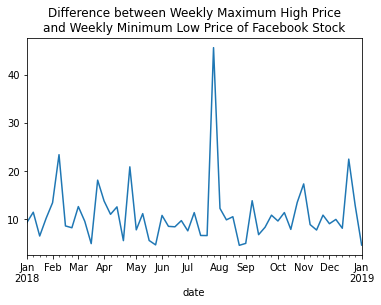

In [22]:
fb.resample('1W').agg(
    dict(high='max', low='min')
).assign(
    max_change_weekly=lambda x: x.high - x.low
).max_change_weekly.plot(
    title='Difference between Weekly Maximum High Price\n'
          'and Weekly Minimum Low Price of Facebook Stock'
)

## Exercise 5
Plot the 14-day moving average of the daily change in new COVID-19 cases in Brazil, China, India, Italy, Spain, and the USA:

1. First use the `diff()` method from last chapter's time series section to calculate the day-over-day change in new cases, and then use `rolling()` to calculate the 14-day moving average.
2. Make 3 subplots: one for China; one for Spain and Italy; and one for Brazil, India, and the USA.

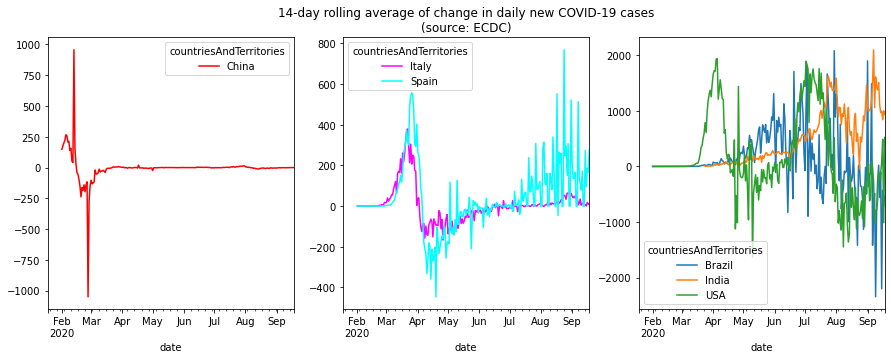

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5)) # make 3 subplots

new_cases_rolling_average = covid.pivot_table(
    index=covid.index, columns=['countriesAndTerritories'], values='cases'
).apply(lambda x: x.diff().rolling(14).mean()) # 14-day moving average

new_cases_rolling_average[['China']].plot(ax=axes[0], color='red')
new_cases_rolling_average[['Italy', 'Spain']].plot( 
    ax=axes[1], color=['magenta', 'cyan'],
    title='14-day rolling average of change in daily new COVID-19 cases\n(source: ECDC)'
)
new_cases_rolling_average[['Brazil', 'India', 'USA']].plot(ax=axes[2])

In [27]:
covid.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
date,,,,,,,,,,,,
2020-01-18,18/01/2020,18,1,2020,0,0,Croatia,HR,HRV,4076246.0,Europe,0.0
2020-01-18,18/01/2020,18,1,2020,0,0,Greece,EL,GRC,10724599.0,Europe,0.0
2020-01-18,18/01/2020,18,1,2020,0,0,United_Kingdom,UK,GBR,66647112.0,Europe,0.0
2020-01-18,18/01/2020,18,1,2020,0,0,Azerbaijan,AZ,AZE,10047719.0,Europe,0.0
2020-01-18,18/01/2020,18,1,2020,0,0,Bahrain,BH,BHR,1641164.0,Asia,0.0


In [26]:
new_cases_rolling_average = covid.pivot_table(
    index=covid.index, columns=['countriesAndTerritories'], values='cases'
).apply(lambda x: x.diff().rolling(14).mean()) # diff :  day-over-day change in new cases

new_cases_rolling_average.head()

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_Republic_of_Tanzania,United_States_Virgin_Islands,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exercise 6
Using `matplotlib` and `pandas`, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:
1. The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review last chapter's time series section for an easy way to do this).
2. The second subplot will be a bar plot showing the net effect this had monthly.
3. Bonus 1: Color the bars by whether they are gains in the stock price (green) or drops in the stock price (red).
4. Bonus 2: Modify the *x*-axis of the bar plot to show the three-letter abbreviation for the month.

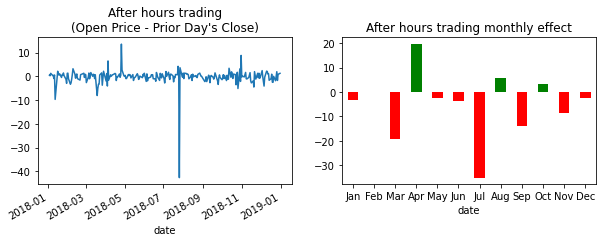

In [28]:
series = (fb.open - fb.close.shift()) # daily difference between that day's opening price and the prior day's closing price
monthly_effect = series.resample('1M').sum() # net effect this had monthly

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

series.plot(
    ax=axes[0],
    title='After hours trading\n(Open Price - Prior Day\'s Close)'
)

monthly_effect.index = monthly_effect.index.strftime('%b')
monthly_effect.plot(
    ax=axes[1],
    kind='bar', 
    title='After hours trading monthly effect',
    color=np.where(monthly_effect >= 0, 'g', 'r'),
    rot=0
)

<hr>
<div>
    <a href="../../ch_05/3-pandas_plotting_module.ipynb">
        <button>&#8592; Chapter 4</button>
    </a>
    <a href="../../ch_06/1-introduction_to_seaborn.ipynb">
        <button style="float: right;">Chapter 6 &#8594;</button>
    </a>
</div>
<hr>